In [1]:
# https://towardsdatascience.com/demystify-mortgage-loan-by-building-a-python-simulator-7c192d201cf6
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import numpy_financial as npf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import plotly.graph_objects as go
from plotly.subplots import make_subplots
DIR = '../data/sales/'
for_sale_f = 'Metro_mlp_uc_sfrcondo_smoothed_month.csv' #The count of unique listings that were active at any time in a given month
pending_f = 'Metro_new_pending_uc_sfrcondo_smoothed_monthly.csv' #The count of listings that changed from for-sale to pending
days_to_pending_f = 'Metro_mean_doz_pending_uc_sfrcondo_smoothed_monthly.csv' #How long it takes homes in a region to change to pending after first being shown as for sale 

list_price_f = 'Metro_mlp_uc_sfrcondo_smoothed_month.csv' #The median price at which homes across various geographies were listed
sales_price_f = 'Metro_median_sale_price_uc_SFRCondo_smoothed_month.csv' #The median price at which homes across various geographies were sold

shares_listing_cut_f = 'Metro_perc_listings_price_cut_uc_sfrcondo_smoothed_month.csv' #The number of unique properties with a list price at the end of the month that’s less than the list price at the beginning of the month, divided by the number of unique properties with an active listing at some point during the month.

In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [6]:
list_price = pd.read_csv(DIR+list_price_f)
sales_price = pd.read_csv(DIR+sales_price_f)

In [4]:
region = 'Los Angeles-Long Beach-Anaheim, CA'
train_years = 3

In [31]:
lp = list_price[list_price['RegionName']==region]
lp = lp.T.iloc[-1*train_years*12:].rename(columns={2:'list_price'})

sp = sales_price[sales_price['RegionName']==region]
sp = sp.T.iloc[-1*train_years*12:].rename(columns={2:'sales_price'})

In [35]:
d = lp.join(sp).dropna()

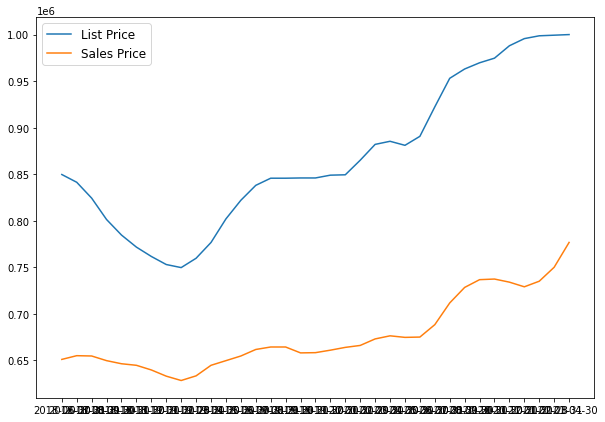

In [37]:
fig, ax = plt.subplots(1,figsize=(10,7));
ax.plot(d['list_price'], label = 'List Price')
ax.plot(d['sales_price'], label = 'Sales Price')
ax.legend(fontsize=12);

In [2]:
p_cut = pd.read_csv(DIR+shares_listing_cut_f)

In [6]:
p = p_cut[p_cut['RegionName']==region]
p = p.T.iloc[-1*train_years*12:].rename(columns={2:'cut_share'})

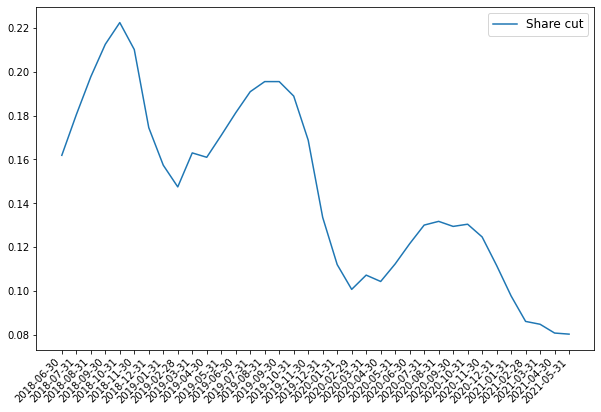

In [11]:
fig, ax = plt.subplots(1,figsize=(10,7));
ax.plot(p['cut_share'], label = 'Share cut')
ax.legend(fontsize=12);
fig.autofmt_xdate(rotation=45)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


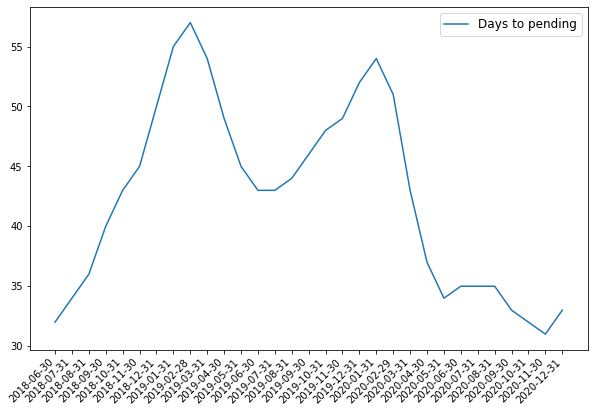

In [17]:
d_pending = pd.read_csv(DIR+days_to_pending_f)
p = d_pending[p_cut['RegionName']==region]
p = p.T.iloc[-1*train_years*12:].rename(columns={2:'days_pending'}).dropna()
fig, ax = plt.subplots(1,figsize=(10,7));
ax.plot(p['days_pending'], label = 'Days to pending')
ax.legend(fontsize=12);
fig.autofmt_xdate(rotation=45)